# Sharpe Ratio Analysis - ARKK ETF 2021

**Background**

During 2020, ARK Invest led by Cathie Woods received unprecendented media coverage, and was touted as the 21st century Buffett by some as a result of the favourable returns generated by their thematic ETFs. 

ARK's Investment Strategy Per Website: *ARK’s thematic investment strategies span market capitalizations, sectors, and geographies to focus on public companies that we expect to be the leaders, enablers, and beneficiaries of disruptive innovation. ARK’s strategies aim to deliver long-term growth with low correlation to traditional investment strategies.*

As described above, Cathie Woods is primarily known for her double-down on innovation strategy and focuses on generating returns through long holding periods of equity in disruptive businesses. However, there is an inherent difficulty of valuing businesses that do not yet yield positive cash flows, and as a result can lead to higher stock price volatility. Since ARKK is focused on thematic investing, and holds an entire of innovation stocks it can be expected that the portfolio as a whole is also highly volatile. 

**Objective**

The objective of this analysis is to compare the returns generated by ARKK in comparison wiith the S&P 500 as the benchmark. The time horizon of this analysis is for the year of 2021, using price data sourced from Yahoo Finance. 

**Metric Used** 

The Sharpe ratio (developed by William F Sharpe) is a common measure of return relative to it's volatility. It is often used to compare investment portfolios, whereby a higher Sharpe ratio is more desirable. 


In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
#Load Financial Data
#Null values removed
spy = pd.read_csv(r"C:\Users\danchang\Desktop\arkk_sharpe_analysis_2\spy2021.csv",
 parse_dates=["Date"],
 index_col=["Date"]
 ).dropna()

arkk = pd.read_csv(r"C:\Users\danchang\Desktop\arkk_sharpe_analysis_2\arkk2021.csv",
 parse_dates=["Date"],
 index_col=["Date"]
 ).dropna()

rf = pd.read_csv(r"C:\Users\danchang\Desktop\arkk_sharpe_analysis_2\tnx2021.csv",
 parse_dates=["Date"],
 index_col=["Date"]
 ).dropna()

In [4]:
#Inspect SPY data 
spy.head()

,Adj Close
Date,
2021-01-04,363.938751
2021-01-05,366.445313
2021-01-06,368.636169
2021-01-07,374.113159
2021-01-08,376.244720


<AxesSubplot:xlabel='Date'>

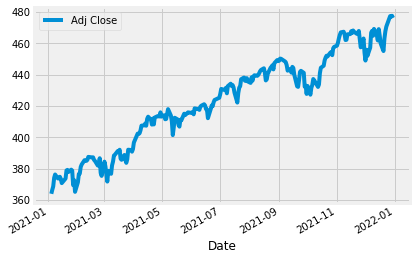

In [5]:
#Visualize SPY data
spy.plot()

In [6]:
#Inspect ARKK data 
arkk.head()

,Adj Close
Date,
2021-01-04,123.669060
2021-01-05,126.713928
2021-01-06,127.180069
2021-01-07,137.246979
2021-01-08,141.313400


<AxesSubplot:xlabel='Date'>

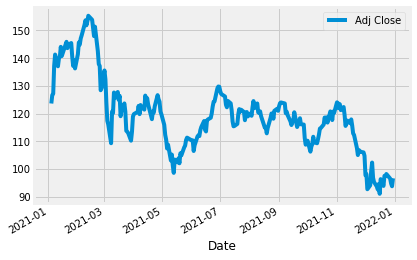

In [7]:
#Visualize ARKK data
arkk.plot()

In [8]:
risk_free_rate = rf.mean()
risk_free_rate_perc = risk_free_rate.div(100)
print(risk_free_rate_perc)

Adj Close    0.014402
dtype: float64


In [9]:
spy_daily_returns = spy.pct_change()
spy_daily_returns = spy_daily_returns.rename(columns={'Adj Close' : 'spy_daily_returns'})
spy_daily_returns.head()

,spy_daily_returns
Date,
2021-01-04,NaN
2021-01-05,0.006887
2021-01-06,0.005979
2021-01-07,0.014857
2021-01-08,0.005698


In [10]:
arkk_daily_returns = arkk.pct_change()
arkk_daily_returns = arkk_daily_returns.rename(columns={'Adj Close' : 'arkk_daily_returns'})
arkk_daily_returns.head()

,arkk_daily_returns
Date,
2021-01-04,NaN
2021-01-05,0.024621
2021-01-06,0.003679
2021-01-07,0.079155
2021-01-08,0.029628


In [11]:
#merge tables
daily_returns = pd.merge(pd.merge(spy_daily_returns,arkk_daily_returns,on='Date'),rf,on='Date')
#no returns on Jan 4 (first day of dataset) delete 
daily_returns = daily_returns.drop(labels="2021-01-04", axis=0)
daily_returns.head()

,spy_daily_returns,arkk_daily_returns,Adj Close
Date,,,
2021-01-05,0.006887,0.024621,0.955
2021-01-06,0.005979,0.003679,1.042
2021-01-07,0.014857,0.079155,1.071
2021-01-08,0.005698,0.029628,1.105
2021-01-11,-0.006741,-0.029899,1.132


In [12]:
daily_returns.describe()

,spy_daily_returns,arkk_daily_returns,Adj Close
count,250.000000,250.000000,250.000000
mean,0.001109,-0.000672,1.442260
std,0.008159,0.025033,0.179493
min,-0.024440,-0.067083,0.955000
25%,-0.003383,-0.017105,1.304000
50%,0.001420,-0.000598,1.481500
75%,0.006193,0.014993,1.583500
max,0.024240,0.104208,1.746000


In [53]:
spy_year_start=spy.loc['2021-01-04']
spy_year_end = spy.loc['2021-12-30']
arkk_year_start=spy.loc['2021-01-04']
arkk_year_end = arkk.loc['2021-12-30']

spy_year_return = (spy_year_end - spy_year_start)/spy_year_start
arkk_year_return = (arkk_year_end - arkk_year_start)/arkk_year_start
spy_excess_return = spy_year_return - risk_free_rate_perc 
arkk_excess_return = arkk_year_return - risk_free_rate_perc

arkk_std_returns = daily_returns['arkk_daily_returns'].std()
spy_std_returns = daily_returns['spy_daily_returns'].std()
annual_factor = np.sqrt(252)

annualized_arkk_std = arkk_std_returns * annual_factor
annualized_spy_std = spy_std_returns * annual_factor

spy_sharpe_ratio = spy_excess_return/annualized_spy_std
arkk_sharpe_ratio = arkk_excess_return/annualized_arkk_std

annual_sharpe_ratio = {'Investment':['ARKK','SPY'], 'Annual Sharpe Ratio' : [[round(arkk_sharpe_ratio,2)],[round(spy_sharpe_ratio,2)]]}
sharpe_table = pd.DataFrame(data=annual_sharpe_ratio)

sharpe_table = sharpe_table.to_string(index=False)

print(sharpe_table)

Investment Annual Sharpe Ratio
      ARKK           [[-1.88]]
       SPY            [[2.27]]


# Conclusion 

The result of this analysis found that ARKK's Sharpe Ratio of -1.88 was significantly lower than the Sharpe Ratio of the S&P 500, which was 2.27 in 2021. 

As the Sharpe Ratio is calculated by subtracting the risk-free rate from the return of the portfolio and dividing by the portfolio standard deviation, ARKK's negative Sharpe Ratio implies a lower return than the risk free rate.

In 2021, ARKK significantly underperformed given the sector rotation and inflation fears. Valuation of growth equities can be sensitive to interest rate changes, as a increase in discount rate for companies that are projected to generate cash flows far in the future can cause significant compression to the company's valuation.  

The result of this analysis implies that ARKK would not have been a great investment to own during 2021, given low returns and high volatility. However, due to the scope of this analysis it does not encompass the performance in other years. A logical next step would be to run the same analysis for the year of 2020, where ARKK outperformed and compare the results. 